In [74]:
# !pip install spacy gensim pandas nltk
# !python -m spacy download en_core_web_sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
import pandas as pd
import spacy
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import nltk
nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups

# Load the spaCy model for named entity recognition
nlp = spacy.load('en_core_web_sm')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Merged_Call_Recordings.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
# # Load the 20 Newsgroups dataset
# newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
# df = pd.DataFrame({'transcription': newsgroups_data.data})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
df = df.head(5000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
df.size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



8280

In [79]:
# Fill NaN values in the 'transcription' column with empty strings
df['transcription'] = df['transcription'].fillna('')

# Ensure all values in the 'transcription' column are strings
df['transcription'] = df['transcription'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Apply the function to extract named entities from the 'transcription' column
df['named_entities'] = df['transcription'].apply(extract_named_entities)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [81]:
# Remove stopwords and short words from named entities
stop_words = set(stopwords.words('english'))
df['named_entities'] = df['named_entities'].apply(lambda x: [word for word in x if word.lower() not in stop_words and len(word) > 2])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [88]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,file_name,transcription,duration,amplitude_mean,amplitude_max,amplitude_min,amplitude_std,total_silence_duration,sentiment_polarity,sentiment_subjectivity,named_entities
0,20240522-172226_2207_+19059665655_Outgoing_Aut...,"Hi there, you've reached",3.893878,-0.000024,0.865850,-0.768604,0.098242,3.127619,0.000000,0.000000,[]
1,20240522-171853_2209_+16475218335_Outgoing_Aut...,"Hello, my speaking, am I speaking with Ms. Ma...",184.469887,-0.000100,0.889776,-0.949314,0.055745,90.939909,0.236296,0.455686,"[Manoharun, Brandon, Viva Rika, January, Bramp..."
2,20240522-171921_2209_+19055025675_Outgoing_Aut...,"Hello, my speaking Jamil van Zing. Your call ...",6.125896,0.000041,0.954569,-0.939353,0.121890,1.416417,0.000000,0.000000,[Jamil van Zing]
3,20240522-171921_2207_+16139697529_Outgoing_Aut...,"Hello. How am I speaking to Ruby? Yes. Hi, th...",62.357914,-0.000053,0.569082,-0.789197,0.049345,33.959909,0.148333,0.523333,"[Ruby, Hussle Kolen, Weaver, a couple days ago..."
4,20240522-172045_2207_+14164174030_Outgoing_Aut...,You have reached the voicemail box of 416.,5.405896,-0.000086,0.651359,-0.876268,0.090557,2.758821,0.000000,0.000000,[416]


In [83]:
# Create a list of named entities
named_entities = df['named_entities'].tolist()

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(named_entities)
corpus = [dictionary.doc2bow(text) for text in named_entities]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [84]:
# Perform LDA topic modeling
num_topics = 3  # Adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
Words: 0.035*"tomorrow" + 0.012*"one" + 0.010*"monthly" + 0.010*"Saturday" + 0.010*"안녕하세요" + 0.009*"two" + 0.007*"second" + 0.007*"6 p.m." + 0.007*"Linux" + 0.007*"Tomorrow"
Topic: 1 
Words: 0.030*"one" + 0.028*"Weaver" + 0.023*"today" + 0.019*"tomorrow" + 0.015*"two" + 0.013*"first" + 0.012*"289-371-1836" + 0.009*"Ontario" + 0.009*"Brenda" + 0.008*"Monday"
Topic: 2 
Words: 0.039*"two" + 0.031*"one" + 0.019*"three" + 0.017*"first" + 0.014*"second" + 0.014*"today" + 0.011*"Vancouver" + 0.011*"tomorrow" + 0.011*"Weaver" + 0.009*"One"


In [85]:
# !pip install plotnine
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text
from plotnine.labels import xlab, ylab, ggtitle
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotnine/_mpl/utils.py:34: UserWarning:

Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/plotnine/_mpl/utils.py:34: UserWarning:

Glyph 45397 (\N{HANGUL SYLLABLE NYEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/plotnine/_mpl/utils.py:34: UserWarning:

Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/plotnine/_mpl/utils.py:34: UserWarning:

Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/plotnine/_mpl/utils.py:34: UserWarning:

Gly

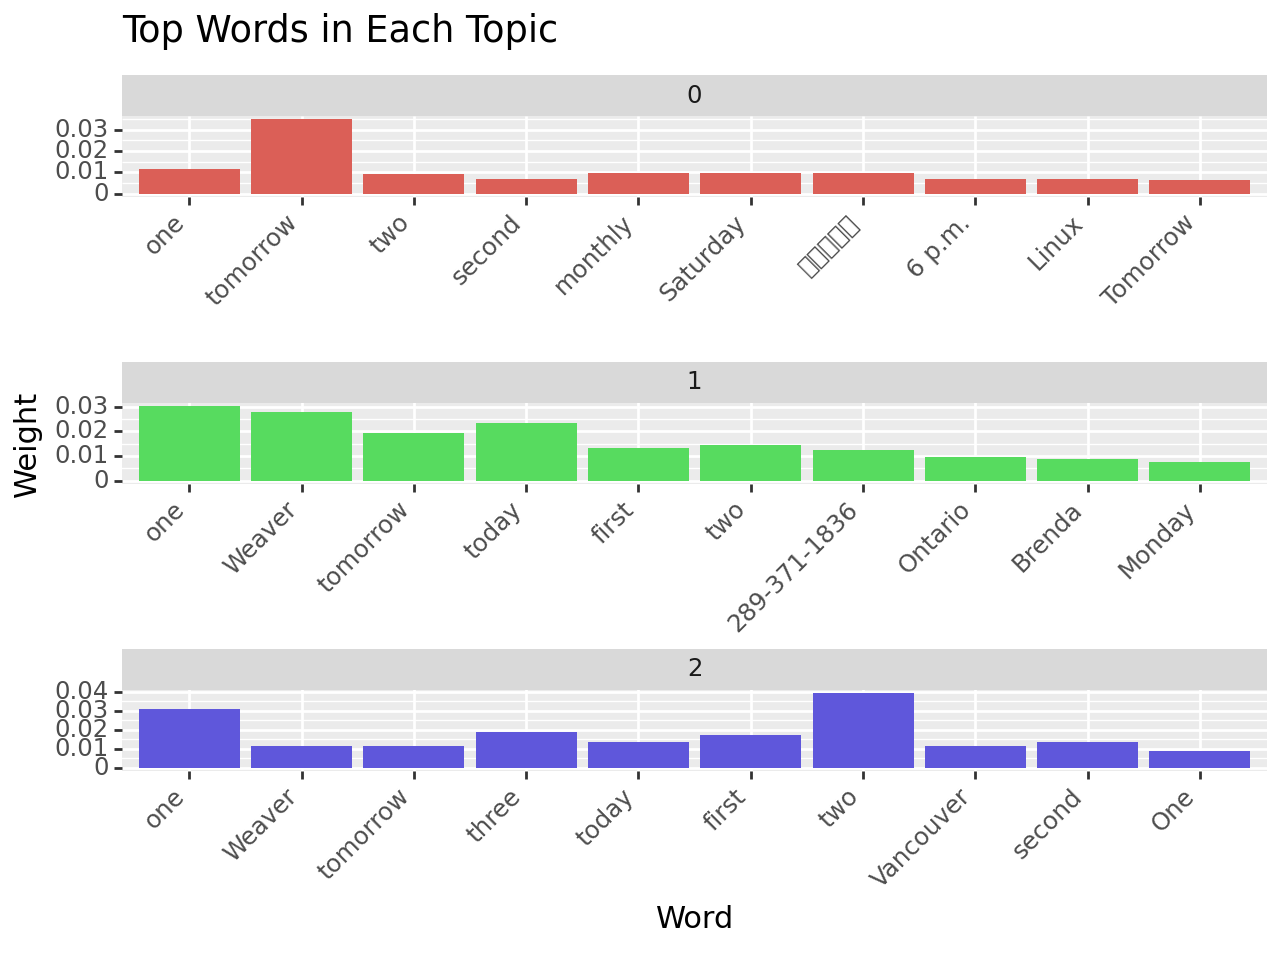

In [86]:
# Extract top words for each topic
top_words_per_topic = []
num_words = 10

for topic_id in range(num_topics):
    top_words = lda_model.show_topic(topic_id, num_words)
    for word, weight in top_words:
        top_words_per_topic.append([topic_id, word, weight])

# Create a DataFrame for visualization
top_words_df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'Weight'])

# Create the plot using plotnine (ggplot in Python)
p = (
    ggplot(top_words_df, aes(x='reorder(Word, -Weight)', y='Weight', fill='factor(Topic)')) +
    geom_bar(stat='identity', show_legend=False) +
    facet_wrap('~Topic', scales='free', ncol=1) +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    xlab('Word') +
    ylab('Weight') +
    ggtitle('Top Words in Each Topic')
)

# Display the plot
print(p)

In [87]:
# Extract top words for each topic
top_words_per_topic = []
num_words = 10

for topic_id in range(num_topics):
    top_words = lda_model.show_topic(topic_id, num_words)
    for word, weight in top_words:
        top_words_per_topic.append([topic_id, word, weight])

# Create a DataFrame for visualization
top_words_df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'Weight'])

# Create the plot using Plotly
fig = px.bar(top_words_df, x='Word', y='Weight', color='Topic', barmode='group',
             facet_row='Topic', title='Top Words in Each Topic')

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

